# Analysis of WebLight Transformation Dataset

Importing necessary modules.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

'dataset.csv' is obtained by running parse.py on the downloaded webpages, Dataset mostly consists of count of different kind of tags that constitute html file. Dataset in total consists of 1171 rows, first few are shown below

In [2]:
data = pd.read_csv('dataset.csv')
data.head()

,Name,Main Mobile Script tags,Main Mobile Image tags,Main Mobile Div tags,Main Mobile Hyperlink tags,Mini Mobile Script tags,Mini Mobile Image tags,Mini Mobile Div tags,Mini Mobile Hyperlink tags,Main Web Script tags,Main Web Image tags,Main Web Div tags,Main Web Hyperlink tags,Mini Web Script tags,Mini Web Image tags,Mini Web Div tags,Mini Web Hyperlink tags,Transcoded
0,google.com,2,1,27,13,8,0,13,4,7,1,77,20,8,0,13,4,0
1,youtube.com,9,3,7,0,8,0,13,4,27,24,261,12,8,0,13,4,0
2,facebook.com,19,1,84,14,8,0,13,4,15,4,93,52,8,0,13,4,0
3,baidu.com,0,0,0,0,19,7,44,15,0,0,0,0,19,7,44,15,1
4,wikipedia.org,4,1,86,320,17,2,72,34,4,1,86,320,16,2,72,33,1


As you can observe last column is of transcoded variable, some pages cannot be transcoded by weblight. However, we have collected these web pages, because they will be useful in our implementation of neural network in later phases of project.
In the code below, transcoded pages have been separated from the dataset.

In [3]:
transcoded = data[data['Transcoded']==1]
not_transcoded = data[data['Transcoded']==0]
pd.options.mode.chained_assignment = None  # default='warn'
transcoded.head()

,Name,Main Mobile Script tags,Main Mobile Image tags,Main Mobile Div tags,Main Mobile Hyperlink tags,Mini Mobile Script tags,Mini Mobile Image tags,Mini Mobile Div tags,Mini Mobile Hyperlink tags,Main Web Script tags,Main Web Image tags,Main Web Div tags,Main Web Hyperlink tags,Mini Web Script tags,Mini Web Image tags,Mini Web Div tags,Mini Web Hyperlink tags,Transcoded
3,baidu.com,0,0,0,0,19,7,44,15,0,0,0,0,19,7,44,15,1
4,wikipedia.org,4,1,86,320,17,2,72,34,4,1,86,320,16,2,72,33,1
5,qq.com,16,128,528,846,25,8,109,40,16,128,528,846,25,8,109,40,1
7,taobao.com,7,0,2,0,20,16,121,15,15,36,110,24,20,16,121,15,1
8,yahoo.com,42,26,644,53,18,1,45,30,38,51,339,104,16,0,40,27,1


To see, how many changes weblight is making to the page, we are going to check four variables; number of script tags, image tags, number of divs and hyperlinks.

In [4]:
transcoded['Script Tag Difference'] = transcoded['Main Mobile Script tags'].sub(transcoded['Mini Mobile Script tags'],fill_value=0)
transcoded['Image Tag Difference'] = transcoded['Main Mobile Image tags'].sub(transcoded['Mini Mobile Image tags'],fill_value=0)
transcoded['Div Tag Difference'] = transcoded['Main Mobile Div tags'].sub(transcoded['Mini Mobile Div tags'],fill_value=0)
transcoded['Hyperlink Tag Difference'] = transcoded['Main Mobile Hyperlink tags'].sub(transcoded['Mini Mobile Hyperlink tags'],fill_value=0)

In [5]:
transformations = pd.DataFrame(transcoded, columns=['Name','Script Tag Difference','Hyperlink Tag Difference','Image Tag Difference','Div Tag Difference'])

Here we have printed means and standard deviations of differences in tags

In [6]:
script_diff = transformations['Script Tag Difference'].mean()
img_diff = transformations['Image Tag Difference'].mean()
div_diff = transformations['Hyperlink Tag Difference'].mean()
a_diff = transformations['Div Tag Difference'].mean()
script_std = transformations['Script Tag Difference'].std()
img_std = transformations['Image Tag Difference'].std()
div_std = transformations['Hyperlink Tag Difference'].std()
a_std = transformations['Div Tag Difference'].std()

In [7]:
print("Average difference between number of script tags in Mobile page and weblight transformed page: ",script_diff,"with std dev of",script_std)
print("Average difference between number of Image tags in Mobile page and weblight transformed page: ",img_diff,"with std dev of",img_std)
print("Average difference between number of Div tags in Mobile page and weblight transformed page: ",div_diff,"with std dev of",div_std)
print("Average difference between number of Hyperlink tags in Mobile page and weblight transformed page: ",a_diff,"with std dev of",a_std)


Average difference between number of script tags in Mobile page and weblight transformed page:  -0.042042042042042045 with std dev of 19.590758788112936
Average difference between number of Image tags in Mobile page and weblight transformed page:  25.922922922922922 with std dev of 55.018680240586406
Average difference between number of Div tags in Mobile page and weblight transformed page:  101.55355355355356 with std dev of 245.00234526071665
Average difference between number of Hyperlink tags in Mobile page and weblight transformed page:  132.33833833833833 with std dev of 259.4691081377459


Following visualisation shows spread around mean for each variable. As expected most of the tags are skewed toward positive side with most of the outlier on positive side as well. Script tag lie almost around zero mark which can be explained because generally there are less script tags than other kinds of tags.

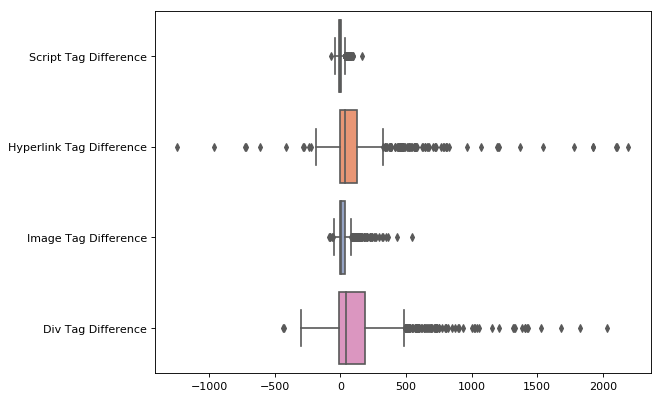

In [8]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sns.boxplot(data=transformations, orient="h", palette="Set2")

Down below, results have been visualised individually as well.

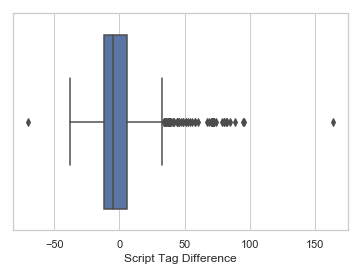

In [9]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=transformations['Script Tag Difference'])

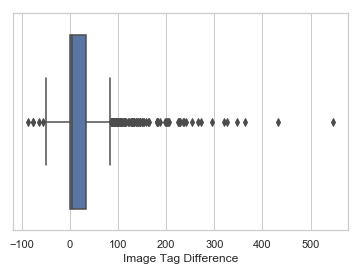

In [10]:
ax = sns.boxplot(x=transformations['Image Tag Difference'])

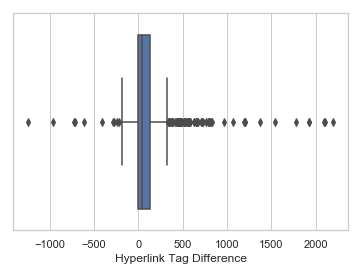

In [11]:
ax = sns.boxplot(x=transformations['Hyperlink Tag Difference'])

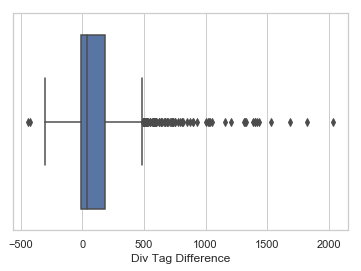

In [12]:
ax = sns.boxplot(x=transformations['Div Tag Difference'])